In [1]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data
from utils import comp_metrics, describe_model_architecture
import numpy as np
import json

In [2]:
version = 'v3'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [3]:
# Daten laden
td, vd = load_data(data_path, window_size=30)

In [4]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [5]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "lstm_2",
    "type": "LSTM",
    "units": 96
  },
  {
    "name": "dropout_2",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "lstm_3",
    "type": "LSTM",
    "units": 64
  },
  {
    "name": "dropout_3",
    "type": "Dropout",
    "dropout_rate": 0.30000000000000004
  },
  {
    "name": "dense_2",
    "type": "Dense",
    "units": 32
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.3025364875793457
Mean Squared Error (MSE): 3.267651081085205
Accuracy: 98.67%


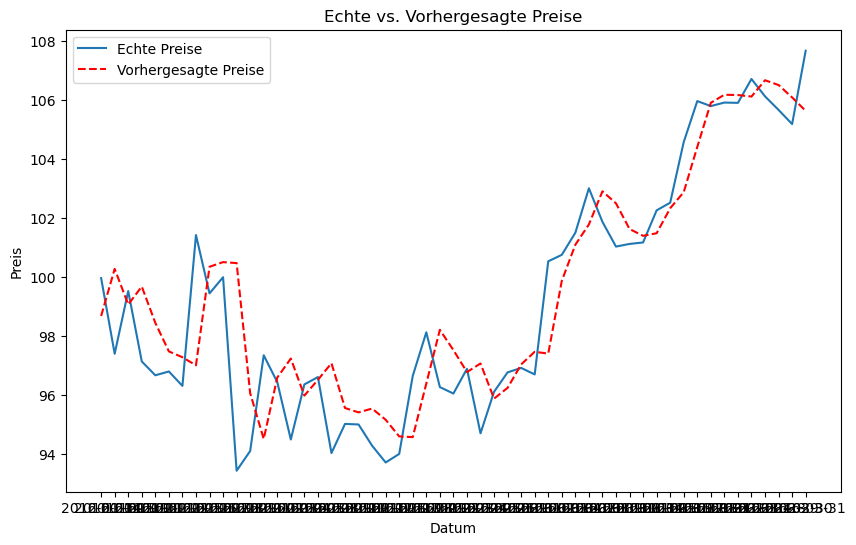

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 11.03481388092041
Mean Squared Error (MSE): 248.96885681152344
Accuracy: 98.03%


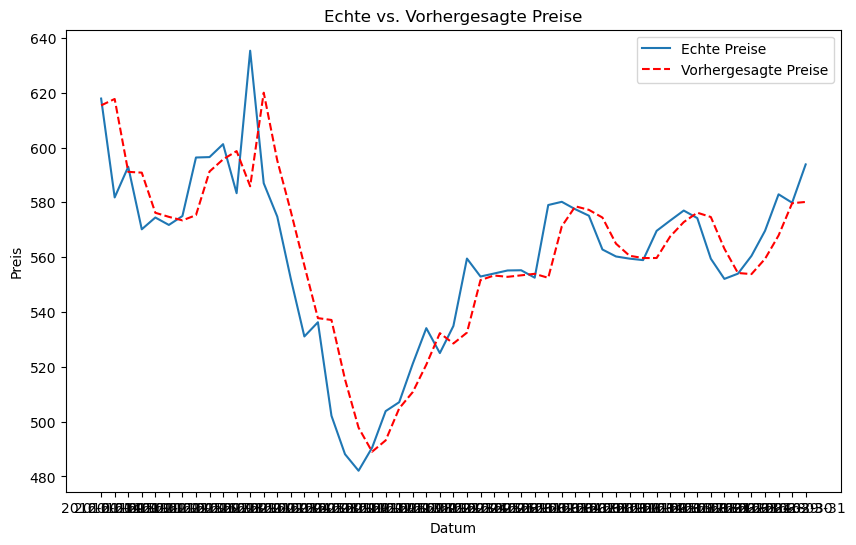

Predicting BABA...
Metrics for BABA
Mean Absolute Error (MAE): 1.063812255859375
Mean Squared Error (MSE): 1.6875991821289062
Accuracy: 98.53%


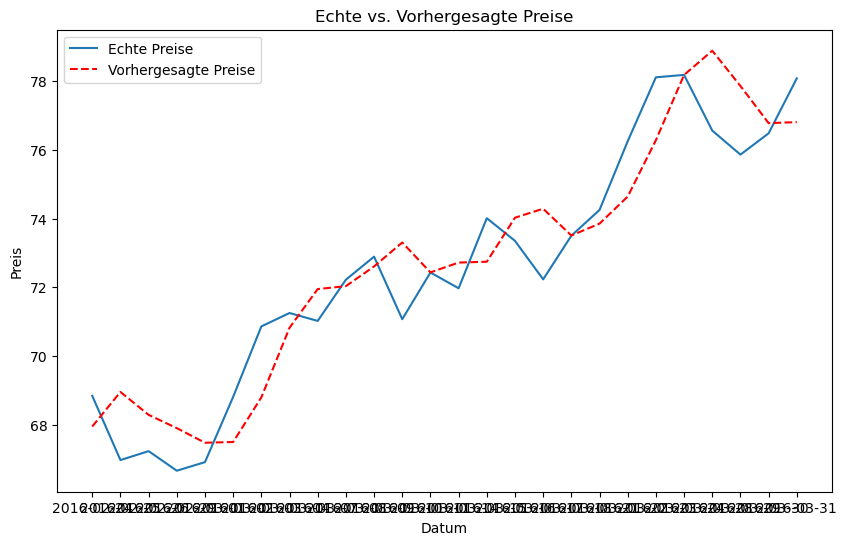

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.37061962485313416
Mean Squared Error (MSE): 0.26638904213905334
Accuracy: 98.51%


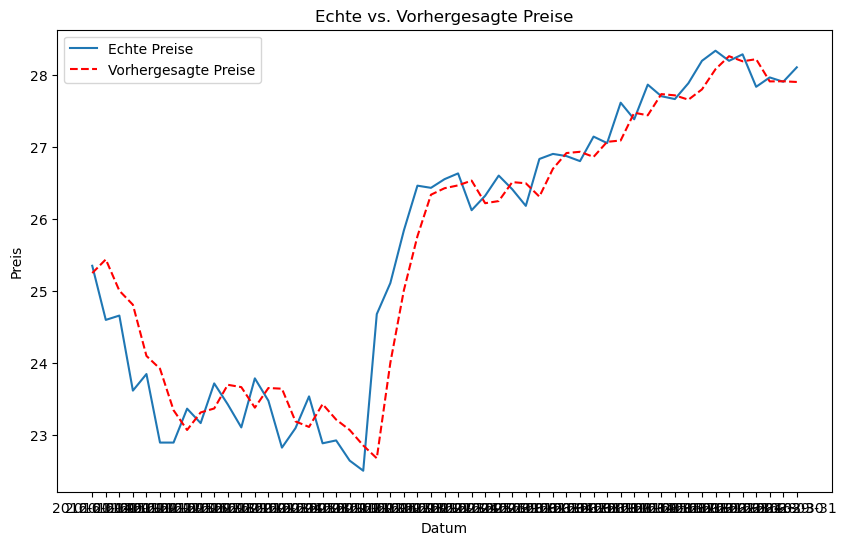

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 2.0397250652313232
Mean Squared Error (MSE): 9.110115051269531
Accuracy: 98.08%


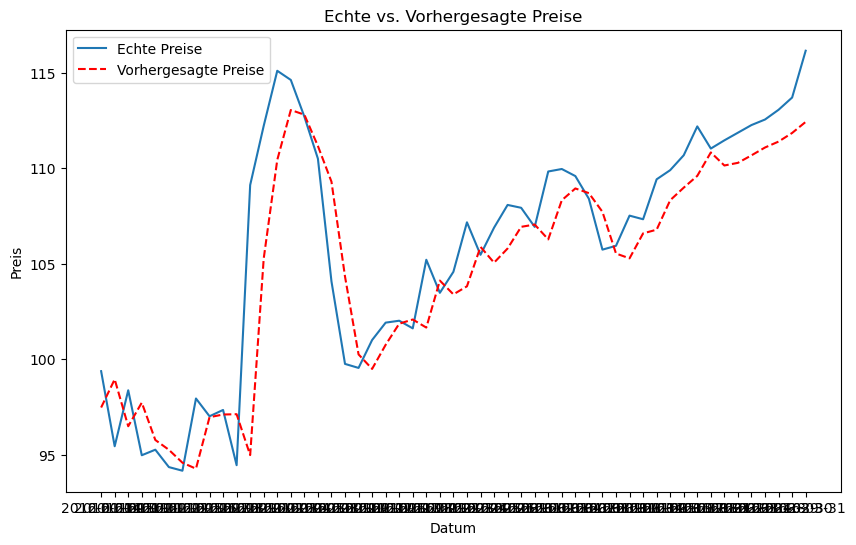

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 9.5487060546875
Mean Squared Error (MSE): 152.48880004882812
Accuracy: 98.67%


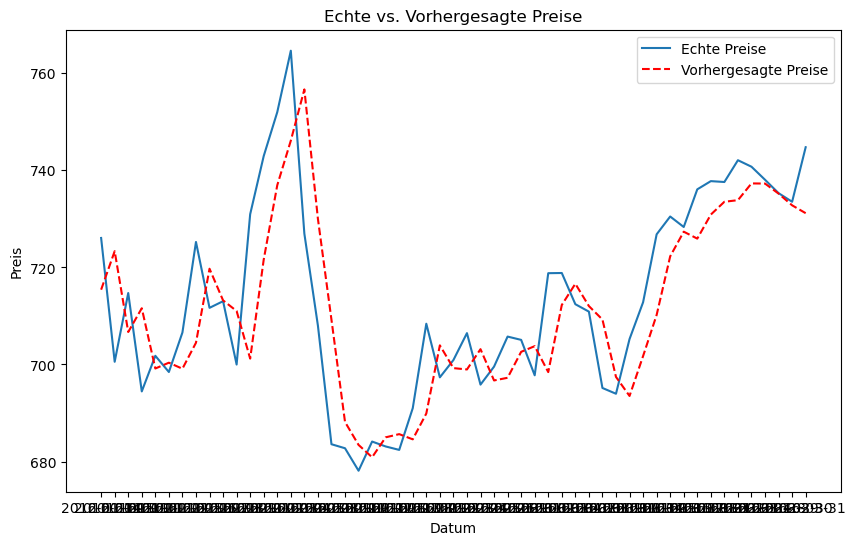

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.4087409973144531
Mean Squared Error (MSE): 0.3644225299358368
Accuracy: 98.65%


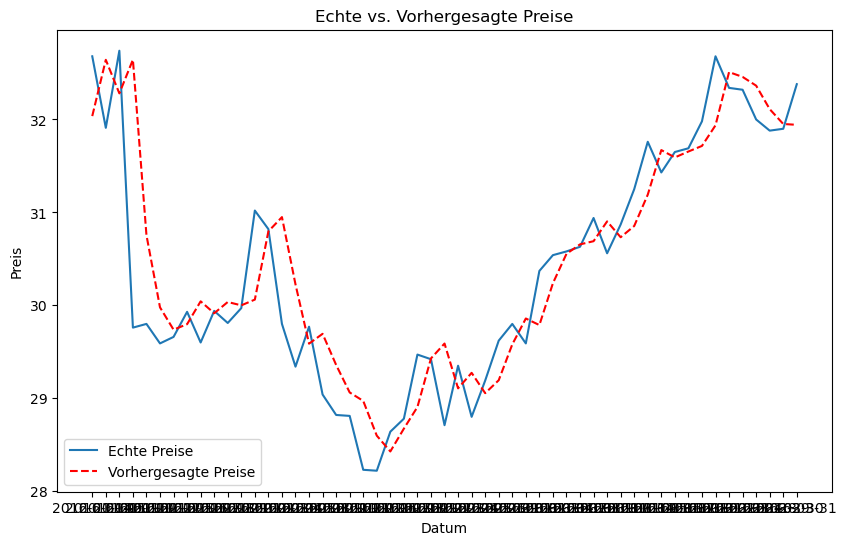

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7695899605751038
Mean Squared Error (MSE): 0.937150776386261
Accuracy: 98.53%


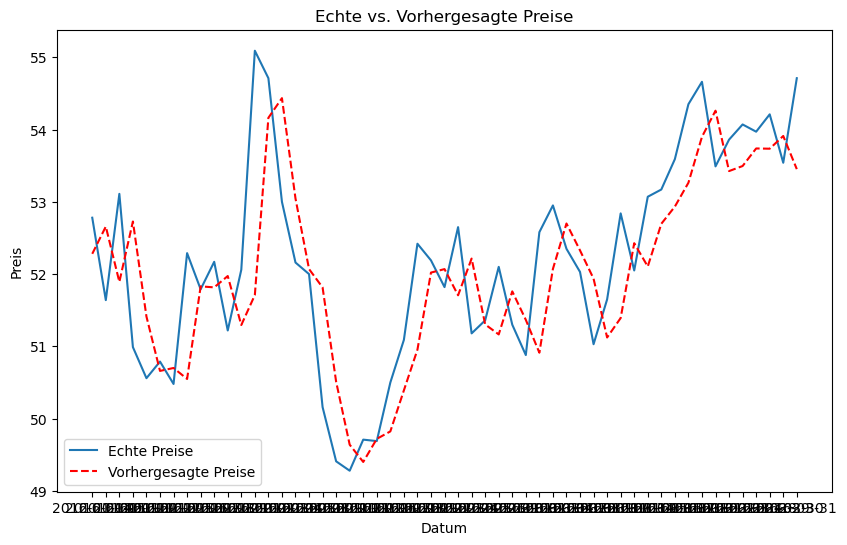

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.42101266980171204
Mean Squared Error (MSE): 0.2837155759334564
Accuracy: 98.86%


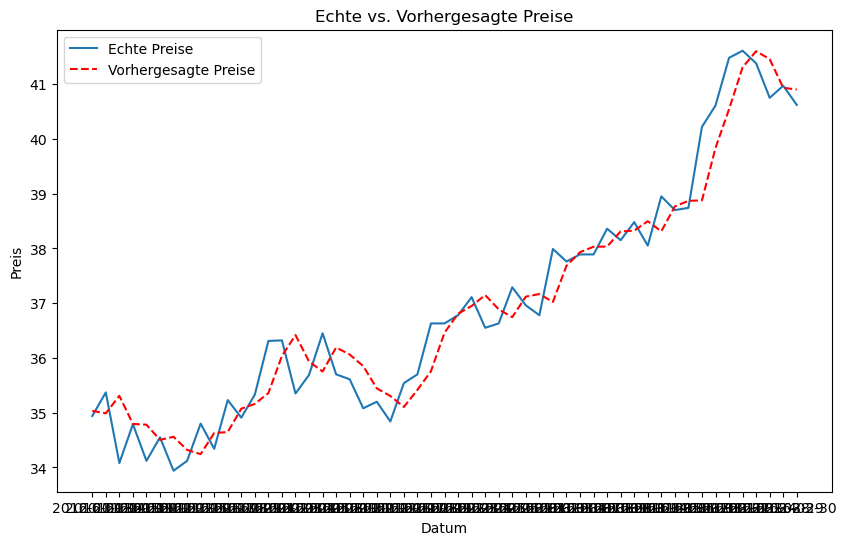

Predicting TSM...
Metrics for TSM
Mean Absolute Error (MAE): 0.31367895007133484
Mean Squared Error (MSE): 0.17391403019428253
Accuracy: 98.66%


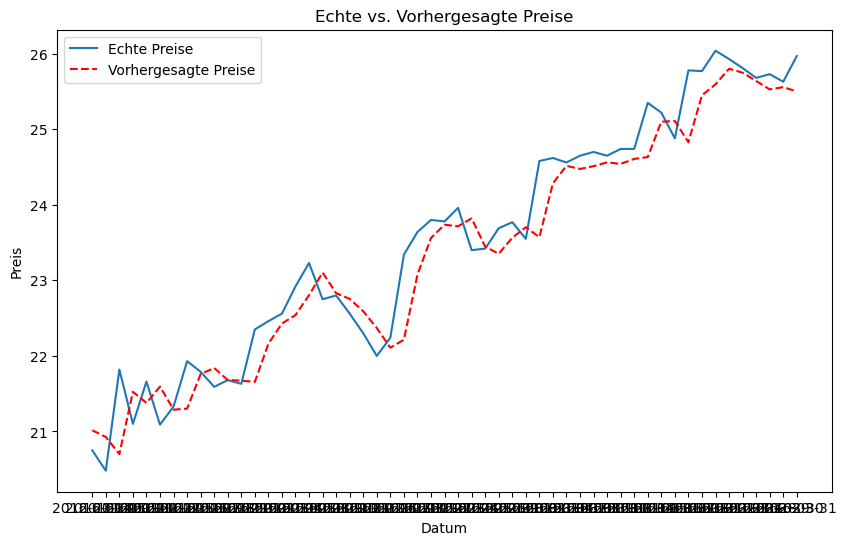

In [6]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict(X)
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)